(final_template)=

# Estimating the Causal Effect of High Short Video Usage on Academic Performance Among Elementary Students in Shenzhen, China

:::{epigraph}

-- Student name: Ngoc Linh Le
:::

# Sections

| Section | Content |
|------------------------------------|-------|
| Prior knowledge | Motivation and Context of study |
| Causal exploration | Causal question and Dataset |
| Design | Study strategy, Covariates, Estimation, Interpretation |
| Conclusion | Withdrawal from the study, Comparison: Original paper's study method vs Experimenting study method|

# Notebook and function imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import ipywidgets as widgets
from ipywidgets import interact_manual
from IPython.display import Image

from final_project_functions import *

# Prior knowledge

## Literature search
**Paper 1:**
Head, Keith. (2025). Short‑form Video Use and Sustained Attention: A Narrative Review (2019–2025). 2. 60-67. 10.6084/m9.figshare.30648764. 

[Paper 1](https://figshare.com/articles/journal_contribution/Short_form_Video_Use_and_Sustained_Attention_A_Narrative_Review_2019_2025_/30648764) 

The explosive growth of TikTok and short-form media has revolutionized the social media habits of Gen Z and Millennials, leading to concerns about attention span in these user demographics. This narrative review covers literature published between 2019 and 2025, investigates the association between short-form video use and perception. Studies have shown that heavy use of TikTok and similar short-form media is associated with shorter attention spans, poorer academic performance and abnormal white matter in the brain linked to behavioral control, raising questions about excessive use and addiction. Young users seemingly of all ages, including perhaps in particular younger ones, may be especially susceptible to attention impairment as their brains continue to develop. Although current research methods have their limitations, the evidence suggests that frequent short-video use is associated with poorer cognitive functioning. Intervention in the form of education and clinical management is advocated for these areas and the need born from increase risk taking behaviour requiring further longitudinal investigations, research investigating long term consequences.

Corrected version here. Originally published in the International Journal of Community Empowerment & Society Administration [IJCESA]


**Paper 2:**

Gong Q, Tao T (2024) The relationship between short video usage and academic achievement among elementary school students: The mediating effect of attention and the moderating effect of parental short video usage. PLoS ONE 19(11): e0309899. 

[Paper 2](https://doi.org/10.1371/journal.pone.0309899)
  
The study collected questionnaires from elementary students in China to study the impact of their short video usage on their academic performance, interestingly, with parental short video usage duration as the moderator in this relationship. This study helps parents, educators, and short video platforms to realise the impact of short videos on children and thus formulating more scientific education programs for children in this age of short videos' booming.

# Estimating the Causal Effect of High Short Video Usage on Academic Performance Among Elementary Students
[Gong Q, Tao T (2024)](https://doi.org/10.1371/journal.pone.0309899) **The relationship between short video usage and academic achievement among elementary school students: The mediating effect of attention and the moderating effect of parental short video usage** 

Below is a motivation and description of the study design for the sake of first context adapted and sourced from [Gong Q, Tao T (2024)](https://doi.org/10.1371/journal.pone.0309899):

> Short videos have gained widespread popularity among elementary school students in China as a major form of entertainment. This phenomenon has sparked extensive discussions in society regarding its compelling yet negative effects on the viewers as children from a young age. Therefore, this study aims to study elementary school students in Shenzen region of China, thus exploring the possibility that their short video usage might negatively impact their academic performance. Besides, the mechanism of this relationship was also examined from the perspective of children’s attention and environmental factors of parents’ short video usage. The research findings indicate that the more elementary school students use short videos, the lower their academic performance, with attention mediating in this relationship. The longer the parental short video usage duration, the exacerbating effect it has on elementary school students’ negative impact on attention caused by short video usage due to its positive moderating effect.

> The original research is a non-experimental, cross-sectional survey study. The study employs a stratified cluster sampling method, selecting one urban and one suburban elementary school in Shenzhen, China. All variables are measured at roughly the same time, at the beginning of a school term, and follows an observational design (no experimental manipulation was involved).

**Raw data** can be found at https://doi.org/10.1371/journal.pone.0309899.s001 (XLSX). This database will be adapted and used for this project.


# Causal Question


# Design

## Assumptions of study design
Given that this follows an observational study design, there are some assumptions that we need to make:
- Consistency: An individual’s observed outcome is the same as their potential outcome under the treatment they actually received.

In this study, short video usage is self-reported from students and categorized clearly (e.g. high vs. low usage), so consistency holds as long as self-reports are reasonably reliable and interpretation of “usage” is consistent across individuals.
  
- Unconfoundedness/ Conditional Exchangeability: After controlling for observed covariates, treatment assignment must be independent of potential outcomes. This is pretty much a challenge since PSM only controls for observed covariates (i.e, in this study are family background, gender, school, grade, class).
  
- Positivity: Every type of student (e.g., by grade, gender, parental education) must have a non-zero chance of being both a high and low short-video user.

In the given sample, this assumption is likely satisfied if both high and low users exist across all demographic groups. However, if certain subgroups are exclusively high or low users, positivity may be violated."
  
- Stable Unit Treatment Variable Assumption (SUTVA): The questionaires and answers are collected independently among the students and their family, and the performance of each student is individual, so one student's video usage should not affect other students' academic performance.

## Study strategy
While the original study method is stratified cluster sampling, my plan for this project is to re-analyze the data using **Propensity Score Matching (PSM)**. The causal question of interest is **whether short video usage has an effect on academic performance**, specifically among elementary school students, and the causal quantity targeted is **Average Treatment Effect on the treated (ATT)**. I focus on estimating the Average Treatment Effect on the Treated (ATT) to understand how high short video usage affects students who actually watch short videos. Given that our dataset is drawn from a specific region in China and is limited to elementary school students, the findings may not generalize to the broader population. As such, ATT provides a more appropriate and policy-relevant causal estimate for this specific subgroup.

$$
ATT = E[Y(1) - Y(0) | T = 1]
$$

- **Treatment ($T$)**: short video usage
- **Outcome ($Y$)**: academic performance (i.e, total exam scores)

I use PSM to control for confounding variables in order to mimic a randomized experiment. To make it work for PSM, I might need to divide the treatment into two groups based on a threshold, which will be detailed below as we explore the variables in the database. 

In the context of this study design, the causal quantity can be interpreted as:
> Among elementary school students who use short videos heavily, what is the expected academic performance difference if they instead used them more lightly?

## Dataset

The data was collected from four sources: 

(1) 1052 students from two elementary schools in an urban and a suburban area in Shenzhen, China’ academic performance in the second semester after the 2022~2023 winter vacation (The exam contains three main subjects: language, mathematics, and English); 

(2) the "Questionnaire on Short Video Usage by students"; 

(3) Attention Test; 

(4) the "Questionnaire on Short Video Usage by parents."

In [23]:
# import cleaned dataset
vid_df = pd.read_excel('~/comsc341cd.github.io/projects/final_project/final-data.xlsx')
vid_df

,1.No.,2.gender,3.school,4.grade,5.class,"6.The role of the ""filler""",7、What is your academic qualification?,8.Does he have his own cell phone?,9.Does he have his own tablet?,10.Parental Intervention (Time limit ),...,Subjective SVU8,Attention1,Attention2,Attention3,Attention4,Att Total,Academic：chinese,Academic：math,Academic：English,Academic：Total
0,1,1,1,2,3,2,6,2,1,NaN,...,1,73,16,18,56,163,99.0,78.0,99.0,276.0
1,2,1,1,2,3,2,5,2,2,NaN,...,2,114,11,13,79,217,100.0,95.0,100.0,295.0
2,3,2,1,2,3,2,5,2,2,1.0,...,1,69,33,16,66,184,100.0,89.0,100.0,289.0
3,4,2,1,5,2,2,5,2,2,1.0,...,0,74,25,27,96,222,78.0,86.0,80.0,244.0
4,5,1,1,2,3,2,5,2,1,1.0,...,3,53,5,8,40,106,95.0,94.0,90.0,279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,1082,2,2,2,2,2,4,2,2,NaN,...,5,67,15,20,1,103,60.0,48.5,89.0,197.5
1048,1083,2,2,2,2,2,5,2,2,NaN,...,3,46,2,8,22,78,66.0,54.0,83.0,203.0
1049,1084,2,2,1,5,2,6,2,1,NaN,...,2,61,25,22,64,172,98.0,100.0,93.0,291.0
1050,1085,1,2,3,4,2,4,2,1,NaN,...,3,59,16,13,66,154,86.0,115.0,99.0,300.0


All data cleaning and preprocessing were conducted according to the study design and documented in a separate processing script. The cleaned dataset was exported and is then used consistently across all following stages of causal analyses to ensure reproducibility and transparency. 

In [24]:
# import preprocessed dataset
vid_df = pd.read_csv("preprocessed_data.csv")
vid_df

,gender,school,grade,parent_edu,ave_short_video_usage/day,exam_score
0,1,1,2,6,3,276.0
1,1,1,2,5,1,295.0
2,0,1,2,5,5,289.0
3,0,1,5,5,4,244.0
4,1,1,2,5,3,279.0
...,...,...,...,...,...,...
1047,0,0,2,4,3,197.5
1048,0,0,2,5,3,203.0
1049,0,0,1,6,2,291.0
1050,1,0,3,4,4,300.0


In particular, there are the following variables that we focus on in the dataset:
- `gender`: student's gender
- `school`: student's school type 
- `grade`: student's grade
- `parent_edu`: parent's education level
- `ave_short_video_usage/day`: daily short-video usage duration
- `exam score`: total exam score 

In [25]:
treatment = 'ave_short_video_usage/day'
outcome = 'exam_score'
covariates = ['gender', 'school', 'grade', 'parent_edu']

## Variable measurement methods

### Treatment variable: Short video usage 
To examine and quantify the short video, researcher designed 14 questions in two dimensions: 6 questions in the objective usage dimension and eight in the subjective usage dimension. The scores for all questions were totaled as an indicator of "short video usage".

Firstly, the study designed the questionnaire based on the referable items from the "Research Report on Internet Usage among Minors in China 2021" to understand the current objective of short video usage among elementary school students. These questions
aimed to provide a rough understanding of the frequency and duration of short video usage among elementary school students. To avoid the randomness introduced by short video usage within a specific period, the questionnaire asked about the average daily dura-
tion and frequency of short video usage during the winter vacation, as well as the duration and frequency of short video usage on weekdays and weekends during the semester before the winter vacation. **Each question was scored on a scale from 0 to 5**, where 0 represented "I haven’t been using short videos during this period." As the duration and frequency of short video usage increased, the scores also increased accordingly.

For PSM, I will categorize the usage of short video into 2 groups. Based on the questionaire from the original study and the database, the variable/ column "15、How long do you spend on average to use short videos every day?" indicates the duration of daily short video usage among the elementary students in the study. Therefore:
- **treatment group ($T=1$)** includes students watching short videos with high duration, or heavy users (`ave_short_video_usage/day >= 4` on scale of 5) 
- **Control group ($T=0$)** includes those with low and moderate duration, or light users (`ave_short_video_usage/day > 0` and `ave_short_video_usage/day < 4` on scale of 5).

In [26]:
# remove rows with 'ave_short_video_usage/day' == 0
vid_df = vid_df.loc[vid_df[treatment] > 0].copy()

# add treatment assignment column "T", treatment group if T == 1, control group if T == 0
vid_df["T"] = (vid_df[treatment] >= 4).astype(int)
vid_df

,gender,school,grade,parent_edu,ave_short_video_usage/day,exam_score,T
0,1,1,2,6,3,276.0,0
1,1,1,2,5,1,295.0,0
2,0,1,2,5,5,289.0,1
3,0,1,5,5,4,244.0,1
4,1,1,2,5,3,279.0,0
...,...,...,...,...,...,...,...
1047,0,0,2,4,3,197.5,0
1048,0,0,2,5,3,203.0,0
1049,0,0,1,6,2,291.0,0
1050,1,0,3,4,4,300.0,1


In [27]:
num_high_usage = vid_df[vid_df[treatment] >= 4].shape[0]
print(f"Number of students with ave_short_video_usage/day >= 4 on scale of 5: {num_high_usage}")

num_low_usage = vid_df[vid_df[treatment] < 4].shape[0]
print(f"Number of students with ave_short_video_usage/day <4 on scale of 5: {num_low_usage}")


Number of students with ave_short_video_usage/day >= 4 on scale of 5: 292
Number of students with ave_short_video_usage/day <4 on scale of 5: 757


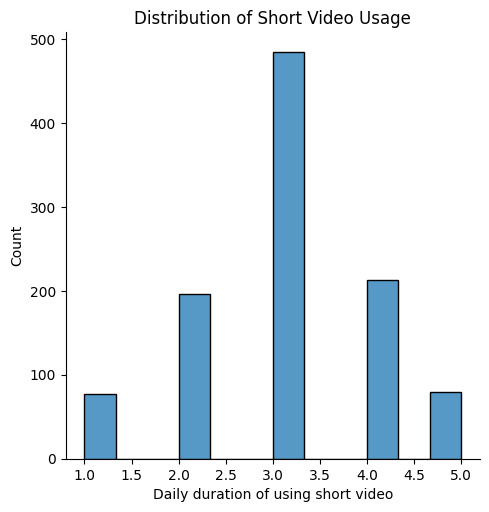

In [28]:
sns.displot(
    data=vid_df,
    x=treatment,
    kind="hist",
)
plt.title("Distribution of Short Video Usage")
plt.xlabel("Daily duration of using short video")
plt.show()

> As can be seen, there is a significant imbalance in the number of students in control and treatment groups, which can be explained by the outstanding number of students watching short videos with a medium duration daily (`vid_df['ave_short_video_usage/day'] == 3`). However, $T=1$ and $T=0$'s big difference in count is not important in the context of PSM. More following analyses will be conducted under the assumption of this imbalance.

### Outcome variable: Academic performance. 

Academic performance is based on students' exam scores. The researcher obtained the opening exam scores for 1052 students in the second semester after the 2022~2023 winter vacation from the academic affairs offices of two elementary schools. The exam contains three main subjects: language, mathematics, and English. Except for the mathematics test, which was out of 120 points, all other tests were out of 100 points.The scores from the three subjects are added and summed, ranging from 0–320, with higher scores indicating better academic performance, as indicated in the variable/ column **"exam score"**.

In [29]:
# Scatterplot to show the relationship between Academic performance and Short video usage
mean_score_by_durarion_df = vid_df.groupby(
    treatment
)[outcome].mean().reset_index() # use reset_index with group_by (dataframe)
mean_score_by_durarion_df

,ave_short_video_usage/day,exam_score
0,1,260.396104
1,2,263.627551
2,3,260.967975
3,4,263.962441
4,5,257.715190


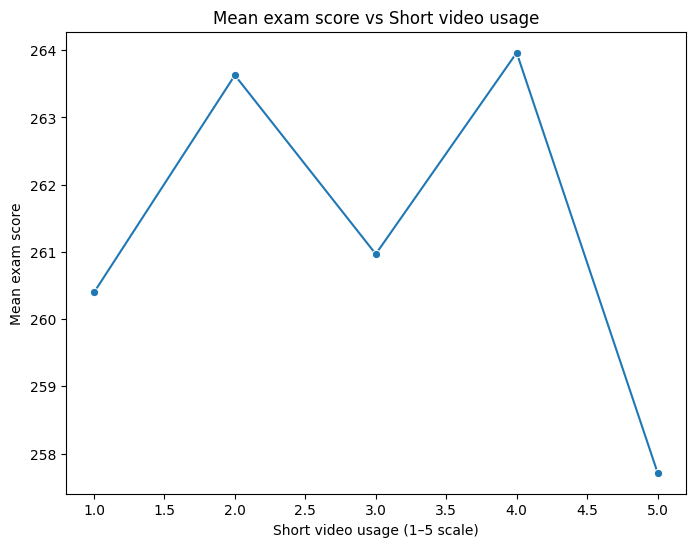

In [30]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=mean_score_by_durarion_df,
    x=treatment,
    y=outcome,
    marker='o'
)

plt.title("Mean exam score vs Short video usage")
plt.xlabel("Short video usage (1–5 scale)")
plt.ylabel("Mean exam score")
plt.show()

> The graph "Mean Academic Performance vs Short Video Usage" does not show a clear linear negative relationship between Short video usage and Mean exam score, but it instead shows a fluctuating trend. However, we can see that there exists the most significant drop in the exam score if the students engage in the most intense short video usage (level 5). More covariates need controlling to better show the relationship between short video usage and academic performance.

### Control variable/ Covariates

Considering that other non-core variables might influence the dependent variable, this study selected **four control variables: school type (urban, suburban), student grade (lower, middle, high grades), student gender (male, female), parents’ education (elementary school, doctorate)**, of which "parent’s education" refers to the one who filled out the questionnaire.

| Code | Variable Type | Description |
|------------------------------------|-------|-------|
| School type | Binary variable | Urban school = 1, Suburban school = 0
| Students' grade | Ordered categorical variable | Low Grade = 1, Middle Grade = 2, High Grade = 3
| Students' gender | Binary variable | Male = 1, Female = 0,
| Parent's education | Ordered categorical variable | Scored from 1 to 7 (e.g., Elementary School = 1, Doctorate = 7)

- School type: Urban schools might have students with different access to technology (more exposure to short-video platforms) and also different academic resources or competition levels that affect performance. Including school location/type in matching helps balance the educational environment between treated and control groups.

- Student grade: Students in higher grades can have more access to the digital device to watch short videos than those in lower grades.

- Gender: Students of different gender can have different habits of watching short videos and using social media in general, for example, in China, it might be assumed that male students often play sports in their leisure time, while female students can spend more time on their own on social media.

- Parent's education: Parents of different educational background can have different awareness and tendency on educating their children, as well as different amount of time spending with them, which impacts the amount of exposure to short videos among students.

When doing Propensity Score Matching, it is important that observations of the same School type, Grade/ Educational stage, Gender, and Parents' education are matched.  

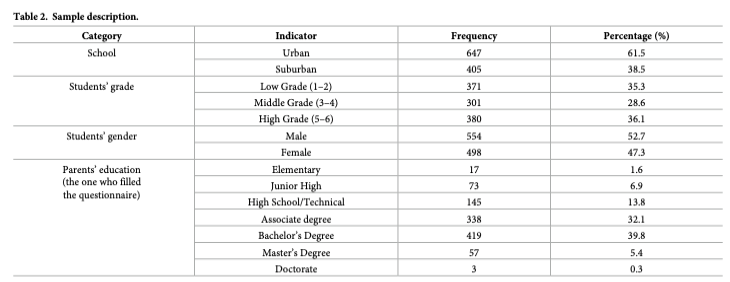

In [31]:
Image(filename='covariates.png', width=700)

**Sample description by covariates**, https://doi.org/10.1371/journal.pone.0309899.t002

### Summary statistics (mean, std) of relevant covariates in the study, grouped by treatment status

In [32]:
# Group by treatment and inspect the arguments
group_by_treatment = vid_df.groupby("T").agg(
    male_ratio=('gender','mean'),
    male_std=('gender','std'),
    urban_school_ratio=('school','mean'),
    urban_school_std=('school','std')
)
# mean: ratio/ proportion, std: variability
group_by_treatment

,male_ratio,male_std,urban_school_ratio,urban_school_std
T,,,,
0,0.521797,0.499855,0.595773,0.491066
1,0.537671,0.499435,0.664384,0.473016


> The ratio of male and female students within each treatment group is pretty balanced (male ratio within each group and the standard devation of gender are both around 50%),


In [33]:
grade_cnt = (
    vid_df.groupby(["T", "grade"])
          .size()
          .reset_index(name="count")
)

# num_high_usage and num_low_usage
# grade_cnt.loc[grade_cnt["T"] == 1, "proportion"] = grade_cnt["count"] / num_high_usage 
# grade_cnt.loc[grade_cnt["T"] == 0, "proportion"] = grade_cnt["count"] / num_low_usage

# another way
grade_cnt["proportion"] = np.where(
    grade_cnt["T"] == 1,
    grade_cnt["count"] / num_high_usage,
    grade_cnt["count"] / num_low_usage
) 

grade_cnt

,T,grade,count,proportion
0,0,1,148,0.195509
1,0,2,121,0.159841
2,0,3,113,0.149273
3,0,4,117,0.154557
4,0,5,133,0.175694
5,0,6,125,0.165125
6,1,1,59,0.202055
7,1,2,40,0.136986
8,1,3,33,0.113014
9,1,4,38,0.130137


> The proportion of students in respective grade is balanced between treatment and control groups as well. For example, ~19% of students in the control group (T=0) is in grade 1, while in treatment group (T=1) the proportion is ~20%, and the comparison is approximate for other grades in both groups.

In [34]:
print("Number of parents by treatment group and by parent's education level")

parent_edu_cnt = (
    vid_df.groupby(["T","parent_edu"])
          .size()
          .reset_index(name="count")
)

parent_edu_cnt["proportion"] = np.where(
    parent_edu_cnt["T"] == 1,
    parent_edu_cnt["count"] / num_high_usage,
    parent_edu_cnt["count"] / num_low_usage
)

parent_edu_cnt

Number of parents by treatment group and by parent's education level


,T,parent_edu,count,proportion
0,0,1,10,0.013210
1,0,2,57,0.075297
2,0,3,106,0.140026
3,0,4,253,0.334214
4,0,5,293,0.387054
5,0,6,38,0.050198
6,1,1,7,0.023973
7,1,2,16,0.054795
8,1,3,38,0.130137
9,1,4,84,0.287671


> The proportion of parents in respective education level is balanced between treatment and control groups. For instance, ~5% of parents in the control group (T=0) has got Mater's Degree, while in treatment group (T=1) the proportion is ~6%, and the comparison is approximate for other grades in both groups. Besides, only treatment group has parents with Doctorate Degree (count=3), but it only accounts for just 1% of the size of treatment group.

> As observed, the covariates are pretty balanced between the treatment and control group, which is important to prevent bias in when conducting PSM.

### Check the correlation among variables

In [35]:
correlation_matrix = vid_df[
    ["gender", "school", "grade", "parent_edu", 
     "ave_short_video_usage/day", "exam_score"]
].corr()

correlation_matrix

,gender,school,grade,parent_edu,ave_short_video_usage/day,exam_score
gender,1.000000,0.037629,0.032859,0.004873,0.017222,-0.018262
school,0.037629,1.000000,0.584521,0.350078,0.010046,0.406791
grade,0.032859,0.584521,1.000000,0.086395,0.034196,0.043642
parent_edu,0.004873,0.350078,0.086395,1.000000,-0.013347,0.323487
ave_short_video_usage/day,0.017222,0.010046,0.034196,-0.013347,1.000000,-0.009195
exam_score,-0.018262,0.406791,0.043642,0.323487,-0.009195,1.000000


> Compared to the original paper, the mediator or attention is not included in my study, and that explain the low correlation between `ave_short_video_usage/day` and `exam_score`. Meanwhile, some of the confounders have a strong correlation with exam score, such as `school` and `parent_edu`, which motivates the use of Propensity Score Matching to control the confounders to study the direct causal effect of short video usage on the academic performance.

We have a DAG to represent the relationship among the variables as below:
![Final Project DAG](final_project_dag.png)

## Propensity Score Matching (PSM)
After testing the correlation between the treatment - short video usage, and outcome - acacademic performance, and checking the balance in the confounders in control and treatment groups, I will use Propensity Score Matching to control for the confounders and check if any difference in the academic performance of the two groups can be attributed to the treatment assignment (high short video usage and low-moderate short video usage).

By PSM, we distill all the covariates into **propensity score $e(X)$**, which is the probability of receiving the treatment assignment $T$ given confounders $X$ (base line characteristics).

$$
e(X) = P(T=1 | X) \in [0,1]
$$
According to the **Propensity score theorem**, if we control for propensity score $e(X)$, we control for the effect of all the **observed** confouders.

$$
\text{If we have: } \quad Y(1), Y(0) \;\perp\; T \mid X,
$$
$$
\text{then: } \quad Y(1), Y(0) \;\perp\; T \mid e(X),
$$

- For every treated unit:
  - Find one control unit that has the closest propensity score
  - Then we match without replacement by removing that counted control unit from future consideration
- Compute the difference-in-means between the treated and control units

For PSM, we will conduct logistic regression with `smf.logit`, considering the current dataset and formula:

$$
\log\left(
\frac{e(X)}{1 - e(X)}
\right)
=
\beta_0 + \sum_{k=1}^{n} \beta_k X_k,
\quad
\text{where } e(X) = P(T = 1 \mid X).
$$

in which $T$ is treatment assignment, and $X$ is the covarates set including gender, grade, school type, and parent education.

In [36]:
vid_df["propensity_score"] = fit_propensity_score(vid_df, "T", covariates)
vid_df

Optimization terminated successfully.
         Current function value: 0.588712
         Iterations 5


,gender,school,grade,parent_edu,ave_short_video_usage/day,exam_score,T,propensity_score
0,1,1,2,6,3,276.0,0,0.316411
1,1,1,2,5,1,295.0,0,0.300772
2,0,1,2,5,5,289.0,1,0.289526
3,0,1,5,5,4,244.0,1,0.305954
4,1,1,2,5,3,279.0,0,0.300772
...,...,...,...,...,...,...,...,...
1047,0,0,2,4,3,197.5,0,0.240206
1048,0,0,2,5,3,203.0,0,0.253838
1049,0,0,1,6,2,291.0,0,0.262864
1050,1,0,3,4,4,300.0,1,0.255157


Next, I plot **propensity score distribution** by $T=0$ and $T=1$ group to see the overlapping part between the two groups, thus checking the positivity assumption.


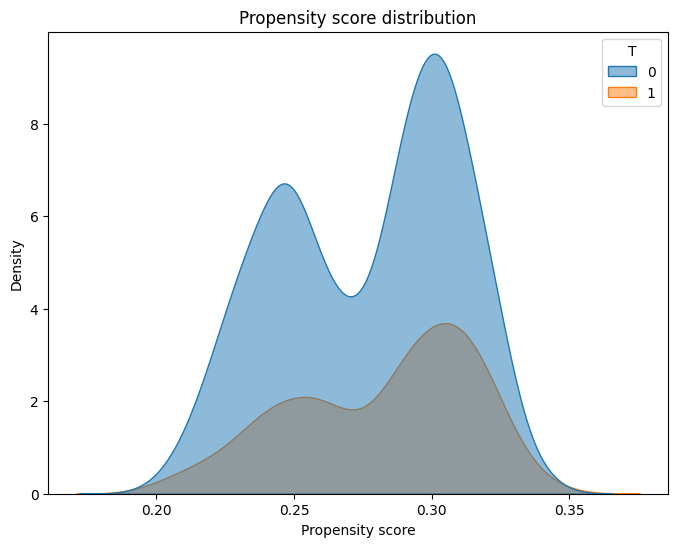

In [37]:
plt.figure(figsize=(8,6))

# melt data into long form
ax = sns.kdeplot(
    data=vid_df,
    x="propensity_score",
    hue="T",
    common_norm=True, # compare relative size between two groups
    fill=True,
    alpha=0.5
)

ax.set_title("Propensity score distribution")
ax.set_xlabel("Propensity score")
ax.set_ylabel("Density")
plt.show()

# print(vid_df[vid_df["T"] == 1].shape[0])

> As we can see, the propensity score distribution of $T=1$ and $T=0$ do overlap, which satisfy the **positivity condition**.

Next, we'll implement **pair matching without replacement** using a **greedy algorithm**.

In [38]:
greedy_pair_match(vid_df, "T", "propensity_score")

,gender,school,grade,parent_edu,ave_short_video_usage/day,exam_score,T,propensity_score
943,0.0,0.0,2.0,1.0,4.0,198.5,1.0,0.202382
908,0.0,0.0,1.0,1.0,3.0,287.0,0.0,0.198187
1021,0.0,0.0,2.0,1.0,5.0,146.0,1.0,0.202382
806,0.0,0.0,3.0,1.0,3.0,166.5,0.0,0.206644
899,0.0,0.0,3.0,1.0,4.0,168.0,1.0,0.206644
...,...,...,...,...,...,...,...,...
333,1.0,1.0,6.0,6.0,3.0,267.5,0.0,0.339496
274,1.0,1.0,6.0,6.0,4.0,251.0,1.0,0.339496
298,1.0,1.0,6.0,6.0,3.0,260.5,0.0,0.339496
233,1.0,1.0,4.0,7.0,4.0,291.0,1.0,0.344203


> As we can see, from 1052 rows, by doing the PSM, the observations are matched based on `propensity_score` and remain only 584 rows. 

We'll implement a function for generating love plots for our subsequent analyses. The first step is to calculate the **standardized difference $d_X$ for a given covariate $X$**, which is defined as:

$$
d_X = \frac{\hat{E}[X \mid T=1] - \hat{E}[X \mid T=0]} { \large \sqrt{\frac{\hat{V}[X \mid T=1] + \hat{V}[X \mid T=0]} {2}}}
$$

Where $\hat{E}[X \mid T=1]$ is the estimated expectation (mean) of the covariate $X$ for the treated units and $\hat{V}[X \mid T=1]$ is the estimated variance of the covariate $X$ for the treated units.

In [39]:
matched_df = greedy_pair_match(vid_df,treat_col="T", prop_score_col="propensity_score")

# dataframe of standardized differences for plotting: compare the std across observed covariates between treated and control groups
std_diff = std_diff_dataframe(matched_df, vid_df, "T", covariates)
std_diff

,covariate,std_diff,data_source
0,gender,0.020557,matched
1,school,0.007231,matched
2,grade,-0.027780,matched
3,parent_edu,0.003095,matched
4,gender,0.031772,matched
5,school,0.142309,unmatched
6,grade,0.103460,unmatched
7,parent_edu,0.109770,unmatched


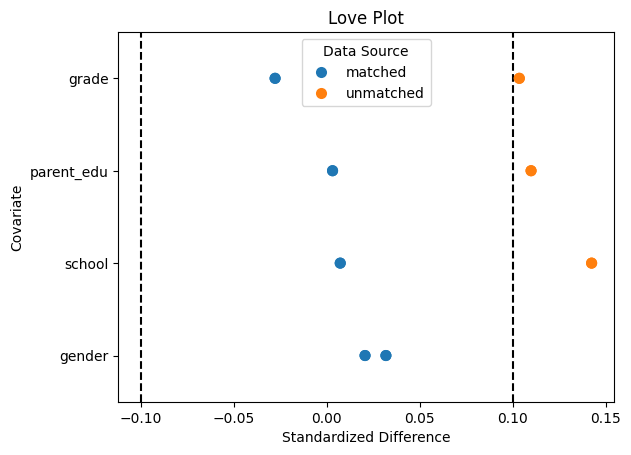

<Axes: title={'center': 'Love Plot'}, xlabel='Standardized Difference', ylabel='Covariate'>

In [40]:
build_love_plot(std_diff)

> It's observed that propensity score matching substantially reduce the covariate imbalance, for which the standardized differences between treatment and control group across all observed covariates lie within range [-0.1, 0.1] in the matched data source compared to unmatched data source.

# Estimation and Interpretation

In [41]:
matched_estimates = generate_estimates(data=matched_df, estimator_func=reg_diff_in_means, treat_col='T', outcome_col=outcome)

summary_df = pd.DataFrame({
    "point_estimate": [round(matched_estimates["point_estimate"], 2)],
    "lower_ci": [round(matched_estimates["ci"][0], 2)],
    "upper_ci": [round(matched_estimates["ci"][1], 2)],
})

print("Estimates")
summary_df

Estimates


,point_estimate,lower_ci,upper_ci
0,-2.61,-7.23,1.69


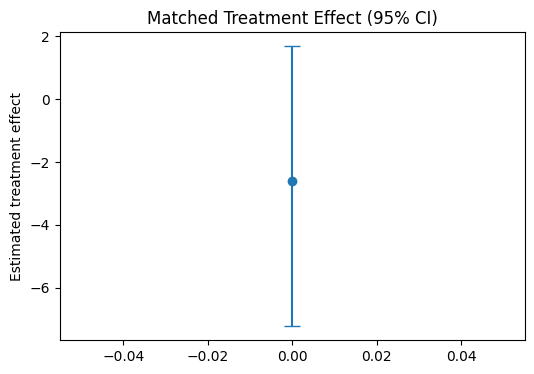

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))

build_estimator_error_bars(
    matched_estimates=matched_estimates,
    ax=ax
)

plt.show()

## Result interpretation

From the Estimates dataframe, it can be seen that the point estimate is -2.06, which suggests a negative effect of using short videos on academic performance. However, it is noted that the 95% confidence interval includes 0, which means there is no significant difference or effect at the chosen confidence level, indicating there is difference between treatment and control groups; therefore, it is safest to limit generalization to elementary students in Shenzhen, China, which are the participants in this study.


# Discussion
## Reflections on study design
Under the context of studying the causal effect of short video usage on the academic performance among elementary students, it's shown in the original dataset and in the correlation analysis above that there are significant confounders impacting both the treatment and outcome, so using the Propensity Score Matching is an appropriate method to control these observed confounders and to estimate the causal quantity, which is attributed to the treatment assignment rather than any baseline characteristics.

However, it should be noted that the Propensity Score Matching just controls the observed covariates as those used in this study, yet there can be unobserved covariates that have not been covered, one of those can be student's awareness, which is characteristic to each of the individual and affect both their usage of short videos and academic performance (i.e, students with higher awareness level might be more resistant to frequent use of short videos, and higher awareness can also lead to better academic performance). Besides that, while the study in the [reference paper](https://doi.org/10.1371/journal.pone.0309899.t002) include attention as the mediator between short video usage and academic performance and parental short video usage as the moderator, these variables are not included in my study design. The absence of these moderating and mediating factors might be the reason for the weak unconditional correlation between the treatment and outcome, and the statistically insignificant average treatment effect estimated after matching. As a result, the estimated effect should only be interpreted as the direct effect of high short video usage on academic performance, conditional on observed covariates. 
   
## Future experiment proposal
To improve the current study design, besides studying the direct effect of short video usage on academic performance, I would consider examining the effect of having a mediator between short video usage and academic performance. In particular, incorporating attention as a mediator would allow for decomposition of the total effect into direct and indirect components. Based on the [reference paper](https://doi.org/10.1371/journal.pone.0309899.t002), there is a much more significant causal effect by watching short videos on attention ability, and by attention ability on academic performance.  

Additionally, I would examine the relationship between parental short video usage and children's short video usage habits and their academic performance, with one plausible hypothesis that the high parental short video usage duration might negatively affect their children's attention ability. This would offer a more diverse perspective on factors surrounding short video usage and academic performance - besides a student's internal characteristics, they can also be external factors (i.e, parents' habit) and cognitive ability developed along the development stage (i.e, attention ability).

## Conclusion

This study examines the causal effect of high short video usage on academic performance among elementary students in Shenzhen, China. After controlling for observed confounders such as age, gender, school type, and parental education using propensity score matching, the point estimate suggests that higher short video usage is associated with lower academic performance. However, the estimated effect is not statistically significant at the 95% confidence interval, indicating uncertainty around the magnitude of the effect.

Despite this limitation, the analysis highlights the importance of accounting for confounding factors when evaluating the relationship between short video usage and academic outcomes. The findings provide preliminary evidence that may inform parents, educators, and policymakers about potential risks associated with excessive short video consumption, while underscoring the need for further research incorporating mediating and moderating mechanisms such as attention and parents' habits as well as broader contextual factors.

# Source code

**See the full data preprocessing pipeline in**
[Final Project: Data Preprocessing](final_project_data_preprocess.ipynb).

**All helper functions are documented in**
[Final Project: Functions](final_project_functions.ipynb).

**zip Google Drive link here**
[Final Project Analysis](https://drive.google.com/file/d/1fOuQBUJ4wm-bME_y4AMjqSU4H9OP9NJ5/view?usp=sharing).
